# Úkol č. 1 - vizualizace dat a web scraping (do 11. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.psp.cz/sqw/hlasovani.sqw?o=8 týkající hlasování současné poslanecké sněmovny, uložit tato data v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Data

 * Měli byste stáhnout data ze všech hlasování současné poslanecké sněmovny (tj. od voleb v roce 2017) a to až na úroveň jednotlivých poslanců. 
 * Data by měla obsahovat i stručný popis toho, o jaké hlasování šlo.

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data a uložte je do vhodného formátu, který se Vám bude dále dobře zpracovávat. 
  * **I když nemusíte mít sněmovnu rádi, snažte se nezahltit server a mezi požadavky na stránku mějte alespoň vteřinu mezeru.**
  * V druhé části Vašeho Jupyter notebooku pracujte se staženými daty v souborech, které jsou výsledkem Vašeho stahovacího skriptu (aby opravující nemusel spouštět stahování z webu).
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Odchody a přeběhnutí poslanců mezi jednotlivými stranami.
    * Jakou mají jednotliví poslanci docházku (účast na hlasování) a jak jsou na tom s docházkou strany jako celek.
    * Jak často spolu jednotlivé strany hlasují ve shodě a jak často hlasují odlišně.
    * Jak jsou poslanci jednotlivých stran jednotní v hlasování (jak často hlasují stejně, kdo jsou největší rebelové).

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * Ve vizualizacích a grafech nějak zachyťte časový vývoj (např. jak se mění docházka, shoda mezi stranami atp.).
  * Najděte jednotlivé poslance, kteří se nejvíce shodují při svém hlasování či kteří mají co nejpodobnější účast na hlasování.
  * Zkuste rozlišit v datech důležitá hlasování a zpracujte vizualizace (také) pro ně.
  * Zkuste najít hlasování, kde poslanci hlasovali nejvíce jinak, než obvykle.
  
## Tipy a triky
  * Balíčky iportujte na začátku notebooku (příp. na začátku scrapovací a pak na začátku vizualizační části).
  * Využívejte markdown buňky (jako je ta, ve které je tento text) a naspisy, abyste usnadnily orientaci opravující(mu).
  * Pečlivě si vybírejte grafy a vizualizace, aby co nejlépe vyjádřily to, co vyjádřit chcete. Doporučuji projít si pro inspiraci alespoň galerie balíčků `matplotlib` a `seaborn`.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte Jupyter Notebook (příp. doplněn skripty), ale i soubor(y) se staženými daty (ať opravující nemusí stahovat data).
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

# Solution
## Data extraction
First - let's get which schuze are available

***note: in following code `%matplotlib notebook` is used. It's better to restart kernel if `%matplotlib inline` was used before***

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

In [268]:
url = " https://www.psp.cz/sqw/hlasovani.sqw?o=8"
page = requests.get(url)
soap = BeautifulSoup(page.text, "html.parser")
schuze_pre=soap.select("tbody > tr td.col-number a")
schuze=[]
for tag in schuze_pre:
    schuze.append(tag.text.split('.')[0])
print('all available schuze:\n',schuze)

all available schuze:
 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61']


### Prepare for extracting data to hlasovani and schuze dataframes
dataframes[0] is a schuze dataframe, which'll be written to schuze.csv

dataframes[1] is a hlasovani dataframe - hlasovani.csv

following method retrieves data from hlasovani page (example: https://www.psp.cz/sqw/hlasy.sqw?g=72722&l=cz)

In [269]:
def process_hlasovani(html_hlasovani, dataframes, nschuze, nhlasovani):
    soap = BeautifulSoup(html_hlasovani, 'html.parser')
    tmp = soap.select("div#main-content > h2 > span")[:-1]
    nazvy_klubu = []
    for nazev in tmp:
        nazvy_klubu.append(nazev.text.split(' ')[0])
        
    cleny_klubu = soap.select("div#main-content > ul.results")
    for i in range(len(nazvy_klubu)):
        for person in cleny_klubu[i].select('li'):
            dataframes[1] = dataframes[1].append({
                'Schůze': nschuze,
                'Č. hl.': nhlasovani,
                'Klub': nazvy_klubu[i],
                'Jmeno': person.a.text,
                'Rozhodnuti': person.span.text
            }, ignore_index = True)
    time.sleep(0.5)

next function retrieves the table from this kind of pages: https://www.psp.cz/sqw/phlasa.sqw?o=8&s=44&l=cz&pg=9
and extracts all hlasovani, linked from this page, using the **`process_hlasovani()`** above

In [270]:
hlasovani_url_base = 'https://www.psp.cz/sqw/'
def process_schuze_page(html_schuze_page, dataframes, nschuze):
    # update schuze dataframe (dataframes[0])
    local_df = pd.read_html(html_schuze_page)[0]
    dataframes[0] = dataframes[0].append(local_df, ignore_index = True)
    
    # update hlasovani dataframe (dataframes[1])
    soap = BeautifulSoup(html_schuze_page,'html.parser')
    jednotliva_hlasovani = soap.select('div.search-results tr > td > a[href^="hlasy"]')
    # for each voting - update dataframe
    for hlasovani in jednotliva_hlasovani:
        process_hlasovani(
            requests.get(hlasovani_url_base + hlasovani['href']).text,
            dataframes,
            nschuze,
            hlasovani.text
        )

### Link what is done
We can process hlasovani page and one schuze page of hlasovani. In order to round everything up we need:
* determine amount of pages for currently processed schuze
* visit each schuze page and apply `process_schuze_page()` to it
* repeat steps above for each schuze from `schuze` list, collected at the beginning of this file

In [287]:
# determine amount of pages of hlasovani table for POST request
def amount_of_pages(html_first_schuze_page):
    soap = BeautifulSoup(html_first_schuze_page,'html.parser')
    selection = soap.select("div#main-content > div.search-results > p.paging > span.pages > a")
    if not selection:
        return 1
    elif selection[-1].text == '>>':
        return int(selection[-1]['href'].split('=')[-1])
    else:
        return int(selection[-2].text)




schuze_post_url='https://www.psp.cz/sqw/phlasa.sqw'

def process_schuze(schuze_number, file_write_mode, write_header):
    # clear container dataframes for each schuze, or pretty soon append() operation will take too much time
    container =[
        pd.DataFrame(columns = ['Schůze','Č. hl.','Bod','Název','Datum','Výsledek']),
        pd.DataFrame(columns = ['Schůze','Č. hl.','Klub','Jmeno','Rozhodnuti'])
    ]
    
    # post request data
    schuze_post_data={
        'o': '8',
        's': schuze_number,
        'pg': '1'
    }
    
    print('\n\nschuze',schuze_number,'started processing')
    r = requests.post(schuze_post_url, schuze_post_data)
    npages = amount_of_pages(r.text)
    print('schuzka',schuze_number,': amount of pages:', npages)
    
    # process first page of hlasovani table (https://www.psp.cz/sqw/phlasa.sqw?o=8&s=44&l=cz&pg=9)
    # first page is processed separately because it's already downloaded
    process_schuze_page(r.text, container, schuze_number)
    # process other pages of hlasovani table
    for page in range(2, npages + 1):
        schuze_post_data['pg'] = str(page)
        r = requests.post(schuze_post_url, schuze_post_data)
        process_schuze_page(r.text, container, schuze_number)
        
    print('schuze',schuze_number,'processed...saving')
    container[0].to_csv('schuze.csv',index=False, mode=file_write_mode, header=write_header)
    container[1].to_csv('hlasovani.csv',index=False, mode=file_write_mode, header=write_header)
    print(schuze_number,'saved')

### Fire

In [288]:
# first schuze is processed separately becauze I want dataframe headers to appear only once (first line of the file),
# and it is desired to make new .csv file each time the procedure is launched
process_schuze(schuze[0],'w',True)
for i in range(1,len(schuze)):
    process_schuze(schuze[i],'a',False)



schuze 1 started processing
schuzka 1 : amount of pages: 1
schuze 1 processed...saving
1 saved


schuze 2 started processing
schuzka 2 : amount of pages: 4
schuze 2 processed...saving
2 saved


schuze 3 started processing
schuzka 3 : amount of pages: 1
schuze 3 processed...saving
3 saved


schuze 4 started processing
schuzka 4 : amount of pages: 7
schuze 4 processed...saving
4 saved


schuze 5 started processing
schuzka 5 : amount of pages: 1
schuze 5 processed...saving
5 saved


schuze 6 started processing
schuzka 6 : amount of pages: 5
schuze 6 processed...saving
6 saved


schuze 7 started processing
schuzka 7 : amount of pages: 8
schuze 7 processed...saving
7 saved


schuze 8 started processing
schuzka 8 : amount of pages: 1
schuze 8 processed...saving
8 saved


schuze 9 started processing
schuzka 9 : amount of pages: 1
schuze 9 processed...saving
9 saved


schuze 11 started processing
schuzka 11 : amount of pages: 1
schuze 11 processed...saving
11 saved


schuze 12 started proces

## Working with data
By now my custom crawler have extracted all the info needed for exploration (it took around 4-5 hours).
Let's put collected data from files into dataframes to easily work with them

In [4]:
hlasy = pd.read_csv('hlasovani.csv')
hlasy.rename(columns={'Schůze': 'Schuze', 'Č. hl.': 'Hlasovani'}, inplace=True)
schuze = pd.read_csv('schuze.csv')
schuze.rename(columns={'Schůze': 'Schuze', 'Č. hl.': 'Hlasovani'}, inplace=True)
schuze['Datum']=schuze['Datum'].apply(lambda d: pd.to_datetime(d).date())

display(hlasy)
display(schuze)

,Schuze,Hlasovani,Klub,Jmeno,Rozhodnuti
0,1,1,ANO,Věra Adámková,A
1,1,1,ANO,Andrej Babiš,A
2,1,1,ANO,Andrea Babišová,A
3,1,1,ANO,Margita Balaštíková,A
4,1,1,ANO,Josef Bělica,A
...,...,...,...,...,...
1395995,61,46,Nezařaz,Tereza Hyťhová,M
1395996,61,46,Nezařaz,Václav Klaus,M
1395997,61,46,Nezařaz,Zuzana Majerová Zahradníková,M
1395998,61,46,Nezařaz,Ivana Nevludová,M


,Schuze,Hlasovani,Bod,Název,Datum,Výsledek
0,1,1,3.0,Inf. o ustavení volební komise PS a volbě členů,2017-11-20,Přijato (zmatečné)
1,1,2,3.0,Inf. o ustavení volební komise PS a volbě členů,2017-11-20,Přijato
2,1,3,NaN,Procedurální hlasování,2017-11-20,Zamítnuto
3,1,4,4.0,Náv.na stanovení počtu čl. MIV,2017-11-20,Zamítnuto
4,1,5,4.0,Náv.na stanovení počtu čl. MIV,2017-11-20,Přijato
...,...,...,...,...,...,...
6978,61,42,6.0,Novela z. o Vojenském zpravodajství (sněmovní ...,2020-07-10,Přijato
6979,61,43,7.0,Novela z. - občanský soudní řád (sněmovní tisk...,2020-07-10,Přijato
6980,61,44,7.0,Novela z. - občanský soudní řád (sněmovní tisk...,2020-07-10,Přijato
6981,61,45,8.0,Novela z. o platu představitelů státní moci (s...,2020-07-10,Přijato


Let's merge `hlasy` and `schuze` so everything is available through 1 dataframe

In [5]:
hlasy = pd.merge(hlasy, schuze, how='left', on=['Schuze','Hlasovani'])
hlasy.drop(columns='Bod', inplace=True)
display(hlasy)

,Schuze,Hlasovani,Klub,Jmeno,Rozhodnuti,Název,Datum,Výsledek
0,1,1,ANO,Věra Adámková,A,Inf. o ustavení volební komise PS a volbě členů,2017-11-20,Přijato (zmatečné)
1,1,1,ANO,Andrej Babiš,A,Inf. o ustavení volební komise PS a volbě členů,2017-11-20,Přijato (zmatečné)
2,1,1,ANO,Andrea Babišová,A,Inf. o ustavení volební komise PS a volbě členů,2017-11-20,Přijato (zmatečné)
3,1,1,ANO,Margita Balaštíková,A,Inf. o ustavení volební komise PS a volbě členů,2017-11-20,Přijato (zmatečné)
4,1,1,ANO,Josef Bělica,A,Inf. o ustavení volební komise PS a volbě členů,2017-11-20,Přijato (zmatečné)
...,...,...,...,...,...,...,...,...
1395995,61,46,Nezařaz,Tereza Hyťhová,M,Novela z. o platu představitelů státní moci (s...,2020-07-10,Přijato
1395996,61,46,Nezařaz,Václav Klaus,M,Novela z. o platu představitelů státní moci (s...,2020-07-10,Přijato
1395997,61,46,Nezařaz,Zuzana Majerová Zahradníková,M,Novela z. o platu představitelů státní moci (s...,2020-07-10,Přijato
1395998,61,46,Nezařaz,Ivana Nevludová,M,Novela z. o platu představitelů státní moci (s...,2020-07-10,Přijato


This many names on one plot would be overwhelming. That's why club migrations will be displayed in subplots. 7 people per plot (there are 7 major colors, so they don't overlap)

### Migrations between parties

In [16]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statistics
import sys

%matplotlib notebook

In earlier commits I displayed club migrations for every person, but most of the graphs were rather boring cause 95% of people were representing only one party. Instead, as my woman suggested, I shall display only the ones, who are interesting to observe.

Following line gives us names of people, who participated in more than one party:

In [7]:
travelers = hlasy.groupby(by='Jmeno').filter(lambda x: len(x['Klub'].unique()) > 1)['Jmeno'].drop_duplicates()

for name in travelers:
    print(name)

Václav Klaus
Zuzana Majerová Zahradníková
Marian Bojko
Tereza Hyťhová
Ivana Nevludová
Lubomír Volný
Jaroslav Foldyna


Lets assign a color to each club, so we can use it in a plot

In [16]:
colors={}
for party in hlasy['Klub'].unique():
    colors[party] = np.random.rand(3)

<IPython.core.display.Javascript object>


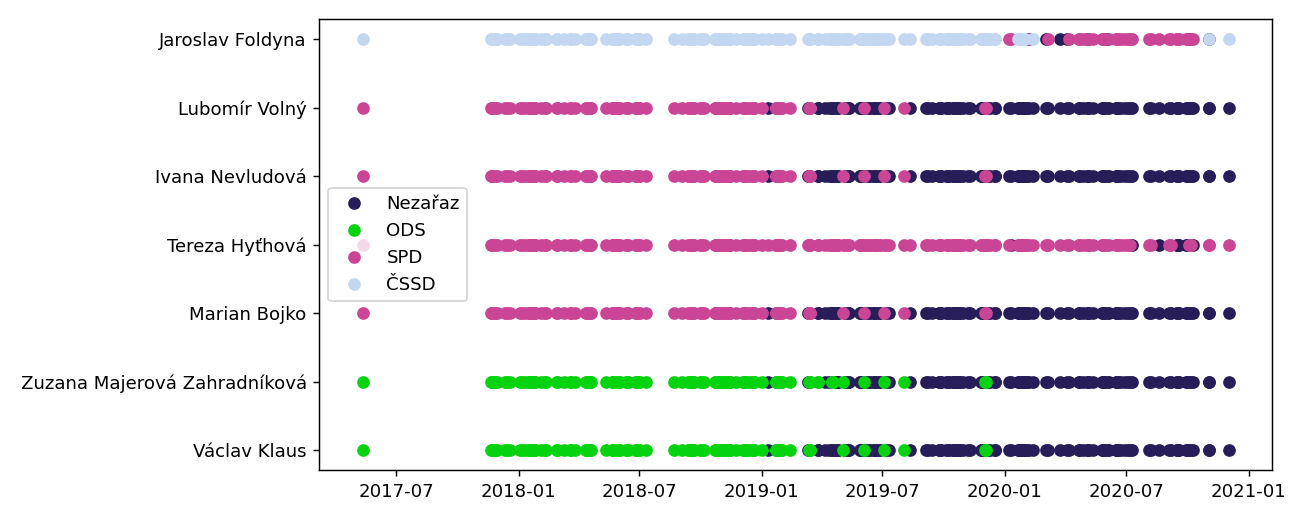

In [19]:
fig, ax = plt.subplots(figsize=(10,4))
clubs_in_legend = []
for name in travelers:
    # for each club person participated in plot dots with club specific color
    for club_name, data in hlasy[hlasy['Jmeno'] == name].groupby(by = 'Klub'):
        dates = data['Datum'].unique()
        label = ""
        if not club_name in clubs_in_legend:
            label = club_name; clubs_in_legend.append(club_name)
        ax.plot_date(dates, [name] * len(dates), c=colors[club_name], label = label)
        
ax.legend()
fig.tight_layout()

We can clearly see that Jaroslav Foldyna switched himself between 3 parties (CSSD, Nezaraz, SPD).
Other travelers were associated with only 2 parties.
Interesting enough - most of them migrated to Nezaraz.

### Person activity
First - let's see what kind of votes we have

In [20]:
hlasy['Rozhodnuti'].unique()

array(['A', 'Z', '0', 'M', 'N'], dtype=object)

* A yes
* Z refused to vote
* 0 not logged in
* M excused
* N no

I'll take activity as the percentage of votes other than `0` and `M`

In [21]:
def object_activity(column, name):
    current_object = hlasy[hlasy[column]==name]
    total_votes = len(current_object)
    active_votes = len(current_object[(current_object['Rozhodnuti'] != '0') & (current_object['Rozhodnuti'] != 'M')])
    return active_votes/total_votes

In [22]:
activity_percentages=[]
names=[]
colors = []

people = hlasy['Jmeno'].unique()
people.sort()
people = people[::-1]

for name in people:
    perc = object_activity('Jmeno', name)
    activity_percentages.append(perc)
    names.append("{} ({:.2f})".format(name, perc))
    colors.append('red' if perc < 0.3 else 'blue' if perc < 0.75 else 'green' )

In [23]:
plt.figure(figsize=(10, 48))
plt.barh(names, activity_percentages, color=colors)
plt.tight_layout()

<IPython.core.display.Javascript object>

Seems like Andrej Babiš doesn't work as much as he should (if i didn't make a mistake)

### Parties activity

In [24]:
activity_percentages=[]
names=[]

for name in sorted(hlasy['Klub'].unique()):
    activity_percentages.append(object_activity('Klub', name))
    names.append(name)

<IPython.core.display.Javascript object>


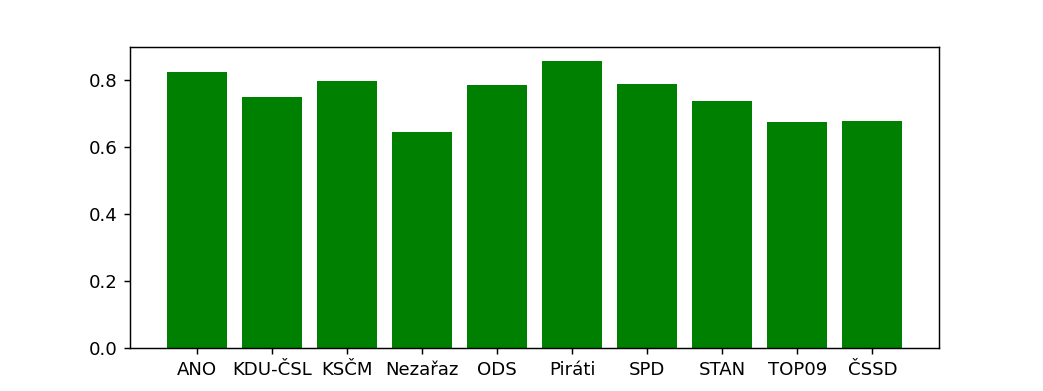

<BarContainer object of 10 artists>

In [25]:
plt.figure(figsize=(8, 3))
plt.bar(names, activity_percentages, color='green')

Seems like Pirati are workoholic

### How often parties vote similarly
I'll define similarity as distance between avarage votes of parties

In [69]:
# set A(ano) to 1, N(ne) to -1, all other values treat as 0 (cause they're neutral)
# and count the avarage vote in party
def avarage_decision(dataframe):
    local = dataframe['Rozhodnuti']
    return local.replace({'A':1,'N':-1,'M':0,'0':0, 'Z':0}).sum() / len(local) if len(local) != 0 else np.nan

# generates real number from 0 to 2
# 0 means that klub_a and klub_b at specific voting voted completely the same (avarage vote is the same, distance = 0)
# 2 means that klub_a and klub_b at specific voting voted completely opposite (distance between avarage votes = 2)
def similarity_value(klub_a, klub_b, nschuze, nhlasovani):
    hlasy_a = avarage_decision(klub_a[(klub_a['Schuze'] == nschuze) & (klub_a['Hlasovani'] == nhlasovani)])
    hlasy_b = avarage_decision(klub_b[(klub_b['Schuze'] == nschuze) & (klub_b['Hlasovani'] == nhlasovani)])
    return abs(hlasy_a - hlasy_b)

def process_simmilarities(klub_a, klub_b):
    result = {
        'dates':[],
        'values':[]
    }
    
    a_frame = hlasy[hlasy['Klub'] == klub_a]
    b_frame = hlasy[hlasy['Klub'] == klub_b]
    
    def process_hlasovani(sch, hls, date):
        result['dates'].append(date)
        result['values'].append(similarity_value(a_frame, b_frame, sch, hls))
        
    # process each hlasovani
    schuze.apply(lambda hlas: process_hlasovani(hlas['Schuze'], hlas['Hlasovani'], hlas['Datum']), axis = 1)
    return result

The plot will be quite havy on computation so I'll generate data first, and then - i'll plot them in order not to run computation each time i forgot some plot settings

In [70]:
parties = hlasy['Klub'].unique()
parties.sort()
reverse_parties = parties[::-1]

data = [[dict() for x in range(len(parties)-1)]for y in range(len(reverse_parties) - 1)]

xrange = len(parties)
for y_party in range(len(reverse_parties) - 1):
    xrange -= 1
    for x_party in range(xrange):
        # compute similarity value between x and y party in each hlasovani
        data[y_party][x_party] = process_simmilarities(reverse_parties[y_party], parties[x_party])
        print('processed',reverse_parties[y_party],parties[x_party])

processed ČSSD ANO
processed ČSSD KDU-ČSL
processed ČSSD KSČM
processed ČSSD Nezařaz
processed ČSSD ODS
processed ČSSD Piráti
processed ČSSD SPD
processed ČSSD STAN
processed ČSSD TOP09
processed TOP09 ANO
processed TOP09 KDU-ČSL
processed TOP09 KSČM
processed TOP09 Nezařaz
processed TOP09 ODS
processed TOP09 Piráti
processed TOP09 SPD
processed TOP09 STAN
processed STAN ANO
processed STAN KDU-ČSL
processed STAN KSČM
processed STAN Nezařaz
processed STAN ODS
processed STAN Piráti
processed STAN SPD
processed SPD ANO
processed SPD KDU-ČSL
processed SPD KSČM
processed SPD Nezařaz
processed SPD ODS
processed SPD Piráti
processed Piráti ANO
processed Piráti KDU-ČSL
processed Piráti KSČM
processed Piráti Nezařaz
processed Piráti ODS
processed ODS ANO
processed ODS KDU-ČSL
processed ODS KSČM
processed ODS Nezařaz
processed Nezařaz ANO
processed Nezařaz KDU-ČSL
processed Nezařaz KSČM
processed KSČM ANO
processed KSČM KDU-ČSL
processed KDU-ČSL ANO


<IPython.core.display.Javascript object>


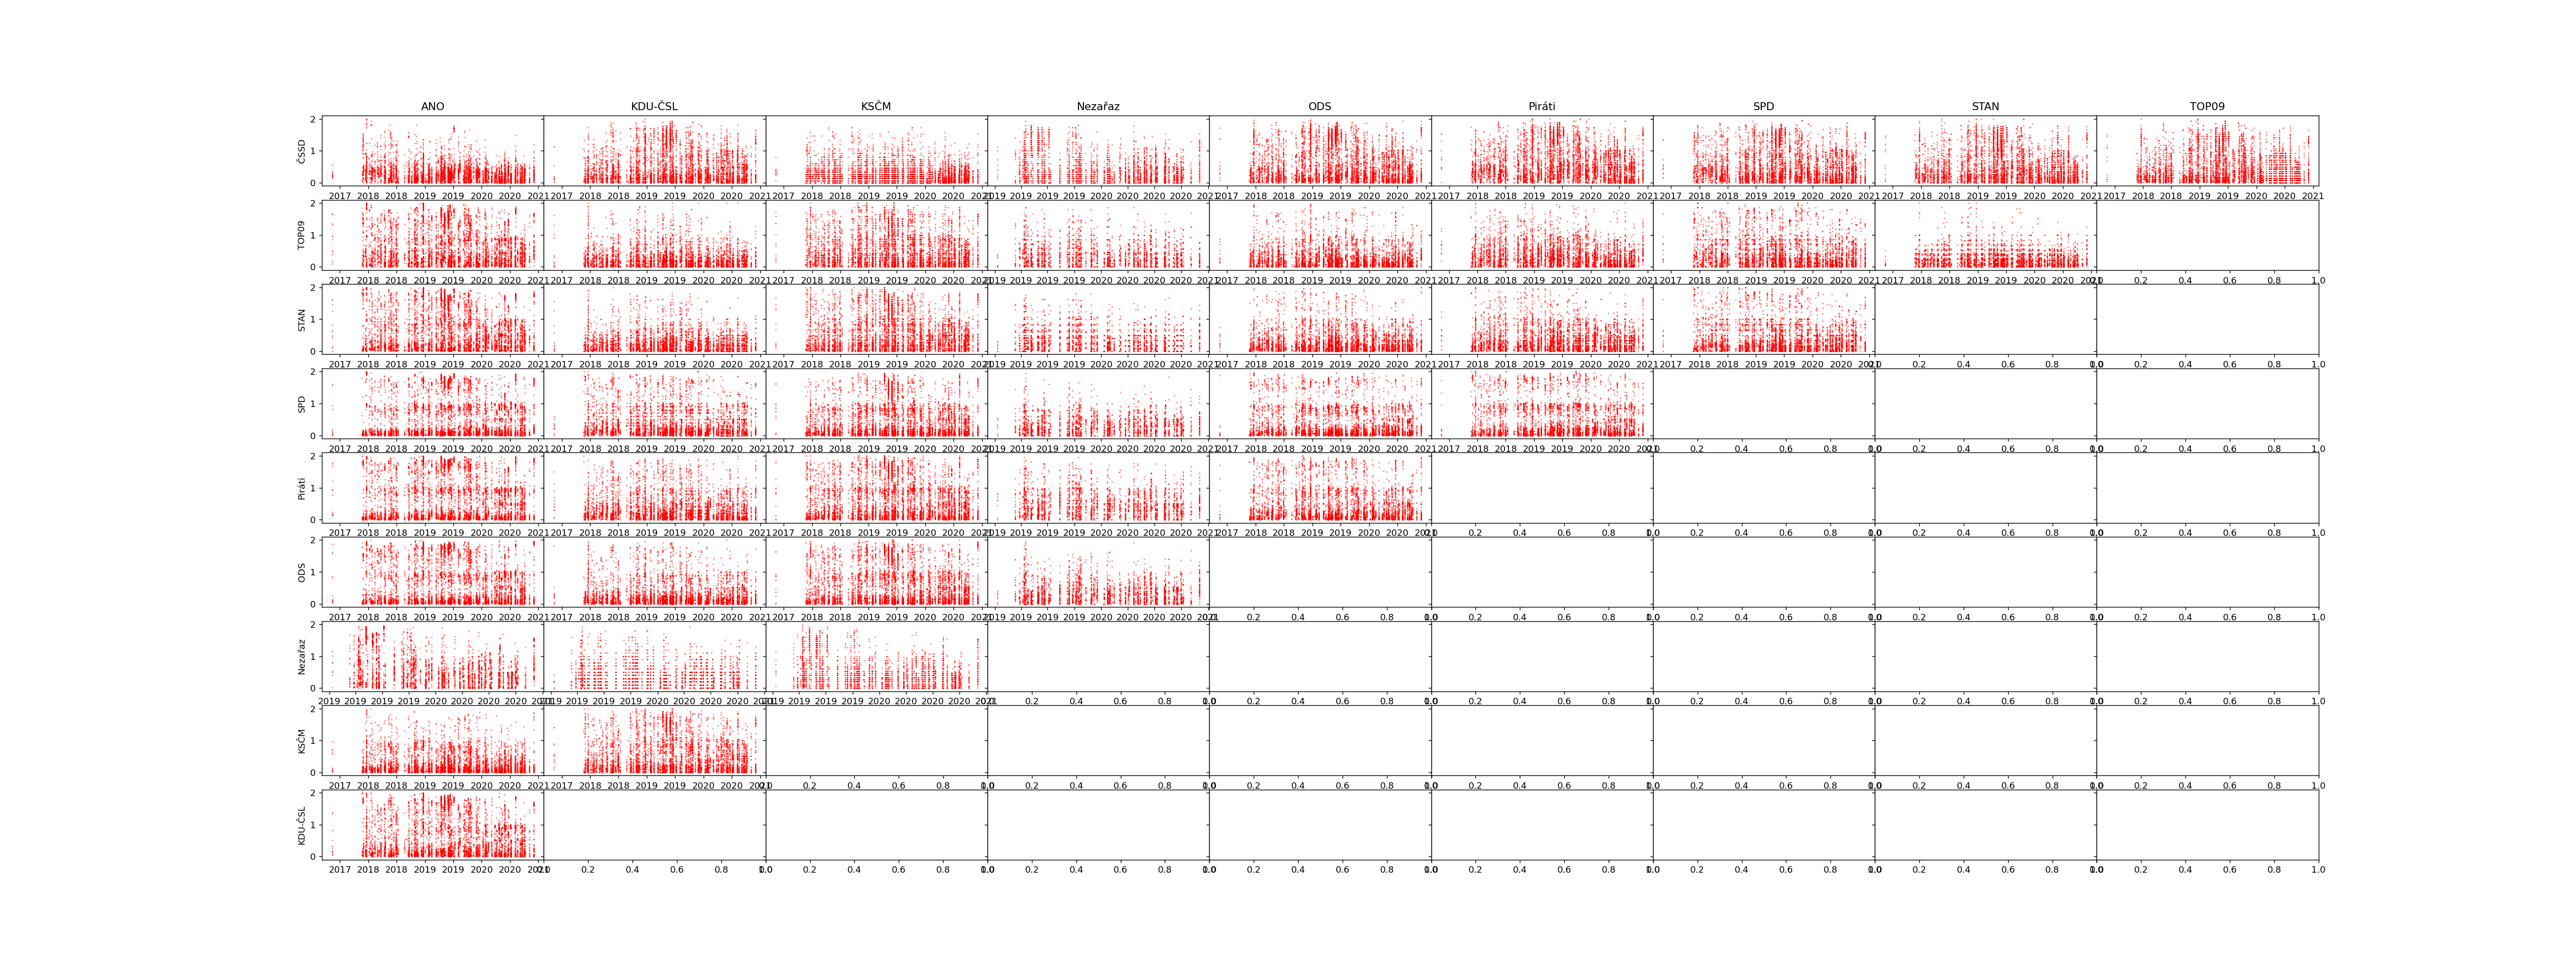

In [71]:
fig, ax = plt.subplots(len(parties) - 1, len(parties) - 1, 
    figsize=(4 * len(parties),1.5*len(parties)),
    sharey=True)
fig.subplots_adjust(wspace=0)

date_formatter = matplotlib.dates.DateFormatter('%Y')

xrange = len(parties)
for x in range(xrange - 1):
    ax[0,x].set_title(parties[x])
    
for y_party in range(len(reverse_parties) - 1):
    ax[y_party,0].set_ylabel(reverse_parties[y_party])
    xrange -= 1
    for x_party in range(xrange):
        plot_data = data[y_party][x_party]
        ax[y_party, x_party].plot_date(plot_data['dates'],plot_data['values'],markersize=0.3, color='red')
        ax[y_party, x_party].xaxis.set_major_formatter(date_formatter)
#fig.tight_layout()

It's impossible to see anything. Thankfully the repo has a copy of plot as an image (party_simmilarity.png), and you can zoom in.

The lower red dots are - the closer is simmilarity between parties during hlasovani.

On the image we can see:
* ANO and ČSSD support each other
* STAN and TOP09 are in peace
* STAN and KDU-ČSL are in peace
* from 2 points above KDU-ČSL and TOP09 must be in peace. The plot proves it.
* KDU-ČSL and ODS are in peace
* ANO are not friendly to majority of parties

### Who is a rebel
I consider a rebel to be the one, who votes different than party mode in more than 50% of votes

Let's create mode for each party for each hlasovani

In [52]:
parties = hlasy['Klub'].unique()
parties.sort()

frame = pd.DataFrame(columns = ['Schuze','Hlasovani'] + parties.tolist())
for key, df in hlasy.groupby(by = ['Schuze', 'Hlasovani']):
    row = [key[0],key[1]]
    for p in parties:
        party_rozhod = df[df['Klub'] == p]['Rozhodnuti']
        row.append(statistics.mode(party_rozhod) if len(party_rozhod) > 0 else np.nan)

    frame.loc[len(frame)]=row
    sys.stdout.write('\r{:.3f}% done, dealing with {}'.format(len(frame)/len(schuze)*100, key))    

99.957% done, dealing with (61, 46)))

In [55]:
display(frame)

,Schuze,Hlasovani,ANO,KDU-ČSL,KSČM,Nezařaz,ODS,Piráti,SPD,STAN,TOP09,ČSSD
0,1,1,A,A,A,NaN,A,A,A,A,A,A
1,1,2,A,A,A,NaN,A,A,A,A,A,A
2,1,3,N,A,Z,NaN,A,N,N,A,A,A
3,1,4,N,A,Z,NaN,Z,A,Z,A,A,N
4,1,5,A,A,A,NaN,A,N,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...
6975,61,42,M,M,M,M,M,M,A,M,M,M
6976,61,43,M,M,A,M,M,M,M,M,M,M
6977,61,44,M,M,A,M,M,M,A,M,M,M
6978,61,45,M,M,A,M,M,M,A,M,M,M


Now check for each person if more than 50% of his votes are different from mode of the team

In [77]:
cnt = 0
hlasy_copy = hlasy

def should_vote(row):
    global cnt
    cnt += 1
    # print status every 10 rows
    if cnt % 10 == 0:
        sys.stdout.write('\r{:.3f}%'.format(cnt/len(hlasy_copy) * 100))
        
    return frame[(frame['Schuze'] == row['Schuze'])&(frame['Hlasovani'] == row['Hlasovani'])].iloc[0][row['Klub']]


hlasy_copy['ShouldVote'] = hlasy_copy.apply(lambda row: should_vote(row), axis = 1)

100.000%

In [86]:
display(hlasy_copy)

,Schuze,Hlasovani,Klub,Jmeno,Rozhodnuti,Název,Datum,Výsledek,ShouldVote
0,1,1,ANO,Věra Adámková,A,Inf. o ustavení volební komise PS a volbě členů,2017-11-20,Přijato (zmatečné),A
1,1,1,ANO,Andrej Babiš,A,Inf. o ustavení volební komise PS a volbě členů,2017-11-20,Přijato (zmatečné),A
2,1,1,ANO,Andrea Babišová,A,Inf. o ustavení volební komise PS a volbě členů,2017-11-20,Přijato (zmatečné),A
3,1,1,ANO,Margita Balaštíková,A,Inf. o ustavení volební komise PS a volbě členů,2017-11-20,Přijato (zmatečné),A
4,1,1,ANO,Josef Bělica,A,Inf. o ustavení volební komise PS a volbě členů,2017-11-20,Přijato (zmatečné),A
...,...,...,...,...,...,...,...,...,...
1395995,61,46,Nezařaz,Tereza Hyťhová,M,Novela z. o platu představitelů státní moci (s...,2020-07-10,Přijato,M
1395996,61,46,Nezařaz,Václav Klaus,M,Novela z. o platu představitelů státní moci (s...,2020-07-10,Přijato,M
1395997,61,46,Nezařaz,Zuzana Majerová Zahradníková,M,Novela z. o platu představitelů státní moci (s...,2020-07-10,Přijato,M
1395998,61,46,Nezařaz,Ivana Nevludová,M,Novela z. o platu představitelů státní moci (s...,2020-07-10,Přijato,M


In [93]:
rebels = []
rebel_values = []

amount_of_names = len(hlasy['Jmeno'].unique())
processed_names = 0
unmatches = 0

def inc_no_eqal(a, b):
    global unmatches
    if a != b:
        unmatches+=1

for name, df in hlasy_copy.groupby(by = 'Jmeno'):
    unmatches = 0
    df.apply(lambda row: inc_no_eqal(row['Rozhodnuti'], row['ShouldVote']), axis = 1)
    if unmatches/len(df) > 0.5:
        rebels.append(name)
        rebel_values.append(unmatches/len(df))
    
    processed_names += 1
    sys.stdout.write('\r{:.3f}%'.format(processed_names/amount_of_names * 100))

100.000%

<IPython.core.display.Javascript object>


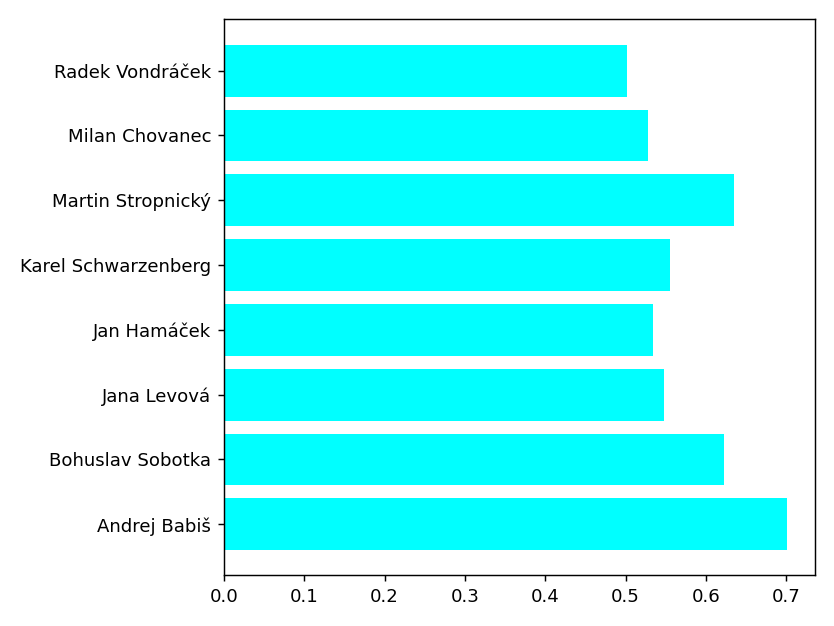

In [97]:
plt.barh(rebels,rebel_values , color='cyan')
plt.tight_layout()

I know nothing about Andrej Babiš, but now I want to know more.